# Praktikum D1

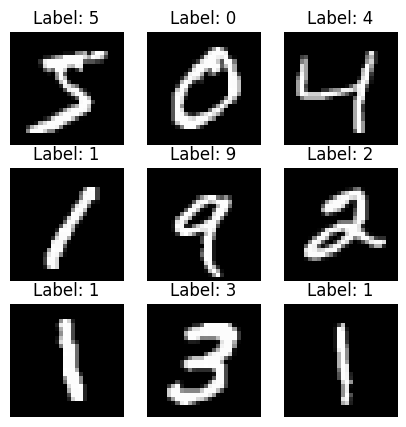

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan Contoh
plt.figure(figsize=(5, 5))
for i in range(9):
  plt.subplot(3, 3, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

Tugas Kecil

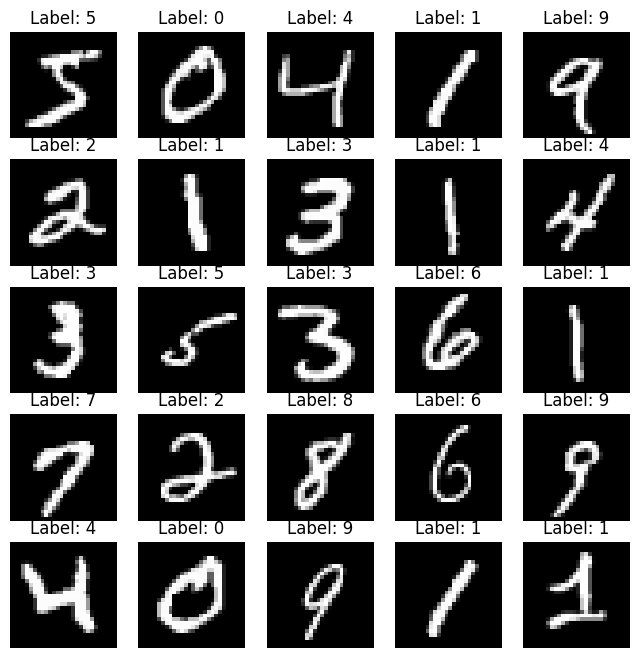

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

# Load data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Tampilkan Contoh
plt.figure(figsize=(8, 8))
for i in range(25):
  plt.subplot(5, 5, i+1)
  plt.imshow(x_train[i], cmap='gray')
  plt.title(f"Label: {y_train[i]}")
  plt.axis('off')
plt.show()

# Praktikum D2

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='linear', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9101


Tugas Kecil

In [ ]:
from sklearn import svm
from sklearn.metrics import accuracy_score
# Flatten
x_train_flat = x_train.reshape(len(x_train), -1) / 255.0
x_test_flat = x_test.reshape(len(x_test), -1) / 255.0
# SVM
clf = svm.SVC(kernel='rbf', gamma='scale')
clf.fit(x_train_flat[:5000], y_train[:5000]) # gunakan subset karena SVM berat
y_pred = clf.predict(x_test_flat)
print("Akurasi:", accuracy_score(y_test, y_pred))

Akurasi: 0.9513


# Praktikum D3

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 38s 21ms/step - accuracy: 0.8919 - loss: 0.3475 - val_accuracy: 0.9832 - val_loss: 0.0653
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9801 - loss: 0.0638 - val_accuracy: 0.9775 - val_loss: 0.0736
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 36s 21ms/step - accuracy: 0.9859 - loss: 0.0427 - val_accuracy: 0.9833 - val_loss: 0.0612
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.9905 - loss: 0.0292 - val_accuracy: 0.9867 - val_loss: 0.0520
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 42s 21ms/step - accuracy: 0.9936 - loss: 0.0211 - val_accuracy: 0.9830 - val_loss: 0.0699


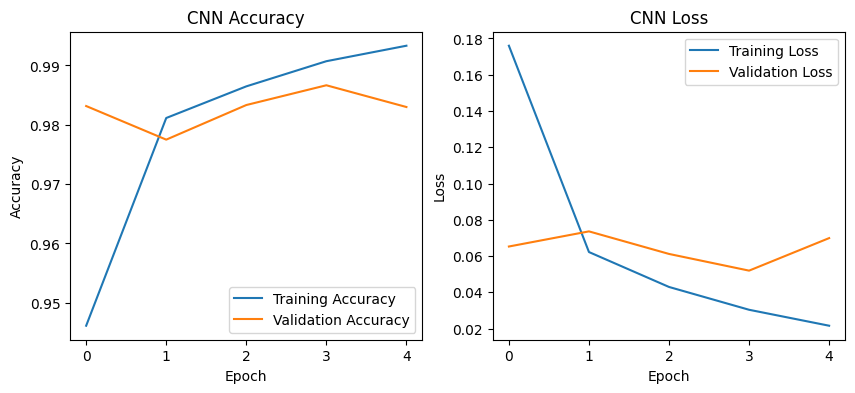

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0
model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 28ms/step - accuracy: 0.9043 - loss: 0.3162 - val_accuracy: 0.9840 - val_loss: 0.0579
Epoch 2/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 84s 29ms/step - accuracy: 0.9837 - loss: 0.0518 - val_accuracy: 0.9902 - val_loss: 0.0371
Epoch 3/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 83s 30ms/step - accuracy: 0.9897 - loss: 0.0323 - val_accuracy: 0.9868 - val_loss: 0.0473
Epoch 4/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 49s 29ms/step - accuracy: 0.9937 - loss: 0.0207 - val_accuracy: 0.9855 - val_loss: 0.0570
Epoch 5/5
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 82s 29ms/step - accuracy: 0.9946 - loss: 0.0156 - val_accuracy: 0.9897 - val_loss: 0.0463


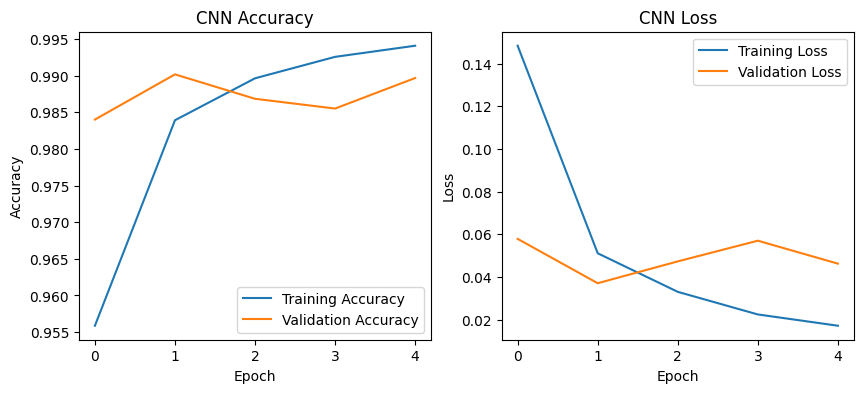

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
x_train_cnn = x_train.reshape(-1,28,28,1) / 255.0
x_test_cnn = x_test.reshape(-1,28,28,1) / 255.0
model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train_cnn, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D4

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 70s 49ms/step - accuracy: 0.3726 - loss: 1.7212 - val_accuracy: 0.5722 - val_loss: 1.2108
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 79s 47ms/step - accuracy: 0.5864 - loss: 1.1771 - val_accuracy: 0.6214 - val_loss: 1.0838
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.6429 - loss: 1.0188 - val_accuracy: 0.6556 - val_loss: 0.9819
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 83s 47ms/step - accuracy: 0.6802 - loss: 0.9237 - val_accuracy: 0.6710 - val_loss: 0.9434
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 47ms/step - accuracy: 0.6976 - loss: 0.8549 - val_accuracy: 0.6742 - val_loss: 0.9510
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 65s 46ms/step - accuracy: 0.7245 - loss: 0.7875 - val_accuracy: 0.6912 - val_loss: 0.8982
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 85s 48ms/step - accuracy: 0.7457 - loss: 0.7305 - val_accuracy: 0.7038 - val_loss: 0.8775
Epoch 8/10
1407/1407 ━━

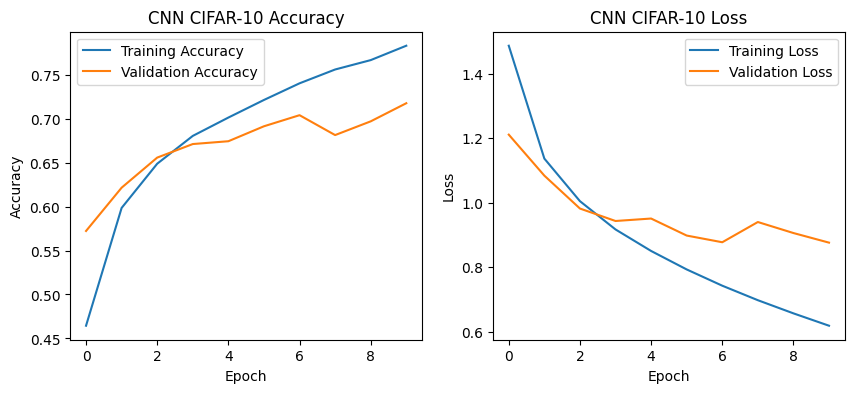

In [ ]:
from tensorflow.keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 63s 43ms/step - accuracy: 0.2641 - loss: 1.9400 - val_accuracy: 0.5136 - val_loss: 1.3631
Epoch 2/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 59s 42ms/step - accuracy: 0.4419 - loss: 1.5227 - val_accuracy: 0.5736 - val_loss: 1.2438
Epoch 3/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 60s 43ms/step - accuracy: 0.5055 - loss: 1.3677 - val_accuracy: 0.6188 - val_loss: 1.0919
Epoch 4/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 80s 41ms/step - accuracy: 0.5454 - loss: 1.2731 - val_accuracy: 0.6168 - val_loss: 1.1001
Epoch 5/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 42ms/step - accuracy: 0.5625 - loss: 1.2208 - val_accuracy: 0.6500 - val_loss: 1.0216
Epoch 6/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 58s 41ms/step - accuracy: 0.5904 - loss: 1.1554 - val_accuracy: 0.6648 - val_loss: 0.9766
Epoch 7/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.5968 - loss: 1.1103 - val_accuracy: 0.6680 - val_loss: 0.9490
Epoch 8/10
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 82s 41ms/step - accuracy: 0.6178 -

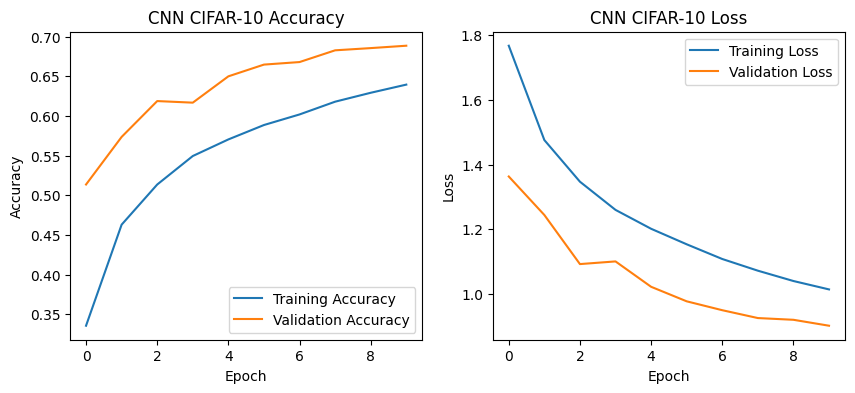

In [ ]:
from tensorflow.keras.datasets import cifar10
from tensorflow.keras import layers, models
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0
model = models.Sequential([
  layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
  layers.MaxPooling2D((2,2)),
  layers.Conv2D(64, (3,3), activation='relu'),
  layers.MaxPooling2D((2,2)),
  layers.Flatten(),
  layers.Dense(64, activation='relu'),
  layers.Dropout(0.5),
  layers.Dense(10, activation='softmax')
])
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

# ===== Plot history =====
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('CNN CIFAR-10 Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('CNN CIFAR-10 Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D5

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 643s 456ms/step - accuracy: 0.4557 - loss: 1.5605 - val_accuracy: 0.5704 - val_loss: 1.2233
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 677s 453ms/step - accuracy: 0.5851 - loss: 1.1998 - val_accuracy: 0.5896 - val_loss: 1.1661
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 680s 451ms/step - accuracy: 0.6010 - loss: 1.1446 - val_accuracy: 0.5970 - val_loss: 1.1464
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 682s 451ms/step - accuracy: 0.6141 - loss: 1.0997 - val_accuracy: 0.5990 - val_loss: 1.1364
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 633s 450ms/step - accuracy: 0.6304 - loss: 1.0597 - val_accuracy: 0.6050 - val_loss: 1.1148


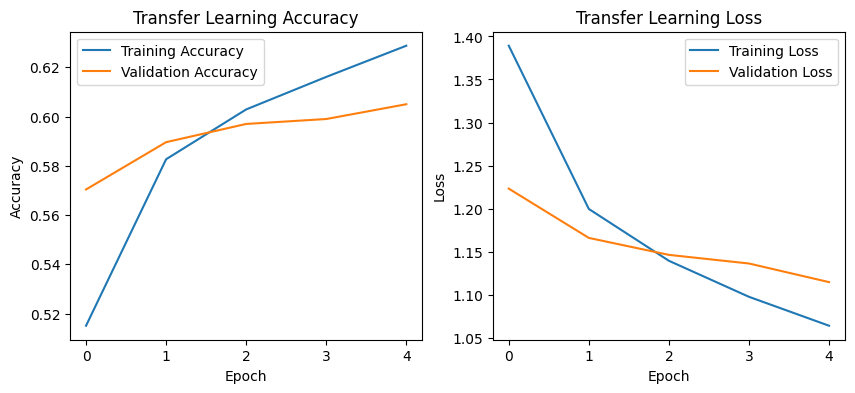

In [ ]:
from tensorflow.keras.applications import VGG16

base_model = VGG16(weights='imagenet', include_top=False,
input_shape=(32,32,3))
base_model.trainable = False

model = models.Sequential([
base_model,
layers.Flatten(),
layers.Dense(128, activation='relu'),
layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
loss='sparse_categorical_crossentropy',
metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# ===== Plot history =====
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
Epoch 1/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2687s 2s/step - accuracy: 0.4972 - loss: 1.4187 - val_accuracy: 0.6826 - val_loss: 0.9359
Epoch 2/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2794s 2s/step - accuracy: 0.7103 - loss: 0.8549 - val_accuracy: 0.7184 - val_loss: 0.8208
Epoch 3/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2864s 2s/step - accuracy: 0.7479 - loss: 0.7313 - val_accuracy: 0.7392 - val_loss: 0.7852
Epoch 4/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2836s 2s/step - accuracy: 0.7749 - loss: 0.6527 - val_accuracy: 0.7316 - val_loss: 0.7912
Epoch 5/5
1407/1407 ━━━━━━━━━━━━━━━━━━━━ 2893s 2s/step - accuracy: 0.8007 - loss: 0.5802 - val_accuracy: 0.7468 - val_loss: 0.7820


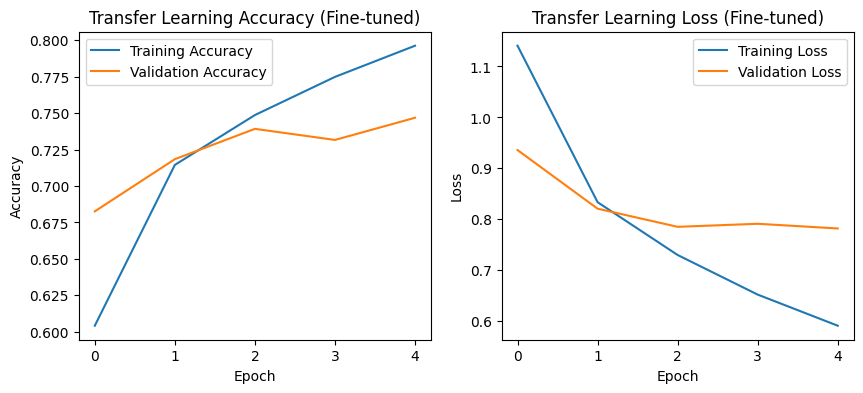

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import cifar10

# Load data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train/255.0, x_test/255.0

# Load VGG16 base
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(32,32,3))

# Bekukan semua layer dulu
base_model.trainable = True
for layer in base_model.layers[:-4]:   # freeze semua kecuali 4 layer terakhir
    layer.trainable = False

# Tambahkan classifier di atasnya
model = models.Sequential([
    base_model,
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(10, activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=5, validation_split=0.1)

# Plot hasil
plt.figure(figsize=(10,4))

plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Transfer Learning Accuracy (Fine-tuned)')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Transfer Learning Loss (Fine-tuned)')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# Praktikum D6

313/313 ━━━━━━━━━━━━━━━━━━━━ 138s 436ms/step
              precision    recall  f1-score   support

           0       0.76      0.81      0.79      1000
           1       0.89      0.77      0.82      1000
           2       0.67      0.71      0.69      1000
           3       0.54      0.57      0.55      1000
           4       0.63      0.78      0.69      1000
           5       0.62      0.66      0.64      1000
           6       0.83      0.70      0.76      1000
           7       0.82      0.76      0.79      1000
           8       0.88      0.80      0.84      1000
           9       0.81      0.79      0.80      1000

    accuracy                           0.73     10000
   macro avg       0.74      0.73      0.74     10000
weighted avg       0.74      0.73      0.74     10000



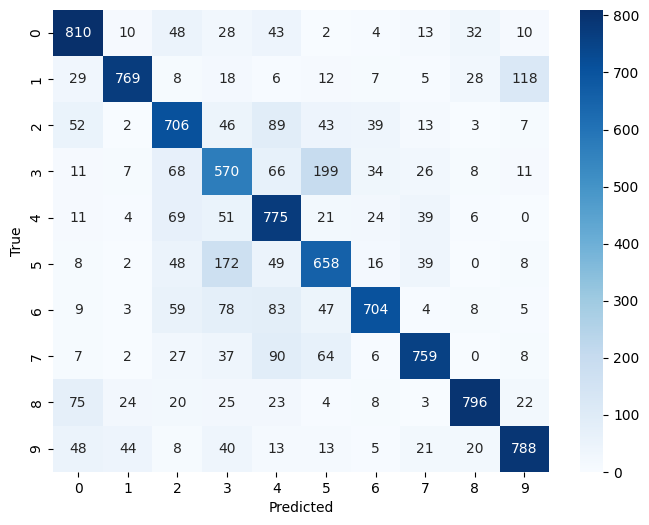

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
y_pred = model.predict(x_test).argmax(axis=1)
print(classification_report(y_test, y_pred))
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Penugasan

In [ ]:
# 1. Import library
import numpy as np
from sklearn import svm
from sklearn.metrics import accuracy_score
from tensorflow.keras.datasets import mnist

# 2. Load dataset MNIST
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(len(x_train), -1) / 255.0  # (60000, 784)
x_test  = x_test.reshape(len(x_test), -1) / 255.0    # (10000, 784)

# 3. Latih model SVM
clf = svm.SVC(kernel='rbf', gamma='scale', probability=True)  # pakai probability=True biar bisa proba
clf.fit(x_train[:10000], y_train[:10000])  # pakai subset 10k biar cepat

# 4. Evaluasi singkat
y_pred = clf.predict(x_test[:2000])
print("Accuracy (subset test):", accuracy_score(y_test[:2000], y_pred))

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Accuracy (subset test): 0.9445


In [ ]:
from PIL import Image
import numpy as np

# ===== Fungsi Preprocessing =====
def preprocess_to_mnist_28x28(img_pil):
    # ubah ke grayscale
    img = img_pil.convert("L")   # grayscale
    # resize ke 28x28
    img = img.resize((28, 28))
    # ubah ke numpy array dan normalisasi [0,1]
    img = np.array(img).astype("float32") / 255.0
    # invert warna: hitam <-> putih (agar mirip MNIST: digit putih di latar hitam)
    img = 1.0 - img
    # tambahkan dimensi channel (untuk CNN, tidak wajib di SVM)
    img_cnn = np.expand_dims(img, -1)   # shape (28,28,1)
    # ratakan ke 1D (untuk SVM)
    img_flat = img.reshape(1, -1)       # shape (1,784)
    return img_cnn, img_flat

# ===== Prediksi =====
fname = "gambar_angka.jpg"   # pastikan file ini ada di Colab
img_pil = Image.open(fname)

# preprocess
x_cnn, x_flat = preprocess_to_mnist_28x28(img_pil)

# prediksi dengan SVM
pred = int(clf.predict(x_flat)[0])

# probabilitas (kalau model dilatih dengan probability=True)
conf = None
try:
    if hasattr(clf, "predict_proba"):
        conf = float(np.max(clf.predict_proba(x_flat)))
except Exception:
    pass

# tampilkan hasil
print(f"{fname} -> Prediksi SVM: {pred}" + (f" (p≈{conf:.2f})" if conf is not None else ""))

gambar_angka.jpg -> Prediksi SVM: 2 (p≈0.37)


In [ ]:
# ===== 1) Upload file foto tulisan angka =====
from google.colab import files
uploaded = files.upload()  # pilih 1 atau lebih file gambar (jpg/png)

# ===== 2) Utilitas Preprocess agar mirip MNIST (28x28, putih-di-atas-hitam) =====

import numpy as np
from PIL import Image, ImageOps

def preprocess_to_mnist_28x28(img_pil):
    """
    Langkah:
    - Konversi ke grayscale
    - Auto-contrast
    - (Opsional) invert bila latar terang (agar digit jadi putih, latar jadi gelap seperti MNIST)
    - Crop ke bounding box digit
    - Resize mempertahankan rasio ke (20x20), lalu pad ke (28x28)
    - Normalisasi ke [0,1] dan tambah axis channel
    """
    # Grayscale + autocontrast
    img = img_pil.convert('L')
    img = ImageOps.autocontrast(img)
    arr = np.array(img).astype(np.uint8)

    # Jika rata-rata terang (kertas putih), invert supaya digit menjadi putih di atas latar gelap (gaya MNIST)
    if arr.mean() > 127:
        img = ImageOps.invert(img)
        arr = np.array(img)

    # Binarisasi ringan untuk cari bbox digit
    thr = np.mean(arr) * 0.8  # ambang adaptif sederhana
    mask = arr > thr
    if mask.any():
        ys, xs = np.where(mask)
        y0, y1 = ys.min(), ys.max()
        x0, x1 = xs.min(), xs.max()
        img = img.crop((x0, y0, x1 + 1, y1 + 1))

    # Resize ke 20x20 dengan aspect ratio
    img.thumbnail((20, 20), Image.Resampling.LANCZOS)
    w, h = img.size

    # Pad ke 28x28 dan center
    canvas = Image.new('L', (28, 28), color=0)
    canvas.paste(img, ((28 - w) // 2, (28 - h) // 2))

    # Normalisasi ke [0,1]
    arr = np.array(canvas).astype('float32') / 255.0

    # Tambah channel dim (28,28,1)
    arr = arr[..., None]

    return canvas, arr

Saving IMG_20250920_184655.jpg to IMG_20250920_184655.jpg
